<a href="https://colab.research.google.com/github/Vikram1Raj/Hierarchical-Clustering-For-EEG-Signals-For-Seizure/blob/main/EEG_Signal_Analysis_For_Seizure_Detection_With_Hierarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
from collections import Counter

from keras.models import load_model
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from keras.utils import to_categorical

from sklearn import svm
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

from tensorflow.keras.optimizers import Adam

In [ ]:
data =  pd.read_csv('')

In [ ]:
data.shape

(2097150, 24)

In [ ]:
data.head()

,# FP1-F7,C3-P3,C4-P4,CZ-PZ,F3-C3,F4-C4,F7-T7,F8-T8,FP1-F3,FP2-F4,...,P3-O1,P4-O2,P7-O1,P7-T7,P8-O2,T7-FT9,T7-P7,T8-P8-0,T8-P8-1,Outcome
0,0.000020,0.000010,0.000022,0.000037,0.000032,0.000035,0.000016,0.000046,-0.000007,0.000043,...,0.000024,-0.000030,0.000010,-0.000011,-0.000037,0.000008,0.000012,0.000021,0.000021,0.0
1,0.000022,0.000008,0.000021,0.000039,0.000030,0.000032,0.000015,0.000039,-0.000006,0.000042,...,0.000026,-0.000017,0.000012,-0.000008,-0.000029,0.000010,0.000009,0.000023,0.000023,0.0
2,0.000021,0.000012,0.000021,0.000040,0.000025,0.000030,0.000013,0.000036,-0.000006,0.000040,...,0.000027,-0.000018,0.000014,-0.000009,-0.000034,0.000012,0.000009,0.000027,0.000027,0.0
3,0.000019,0.000012,0.000021,0.000039,0.000023,0.000028,0.000013,0.000035,-0.000008,0.000036,...,0.000030,-0.000024,0.000015,-0.000009,-0.000042,0.000009,0.000010,0.000033,0.000033,0.0
4,0.000019,0.000012,0.000021,0.000036,0.000023,0.000024,0.000012,0.000024,-0.000009,0.000032,...,0.000032,-0.000014,0.000017,-0.000008,-0.000031,0.000009,0.000008,0.000035,0.000035,0.0


In [ ]:
#Count of Ictal and Preictal
class_counts = data['Outcome'].value_counts()

In [ ]:
class_counts

0.0    1048575
1.0    1048575
Name: Outcome, dtype: int64

In [ ]:
#Preictal Count
class_counts[0]

1048575

In [ ]:
#Ictal Count
class_counts[1]

1048575

####Graph

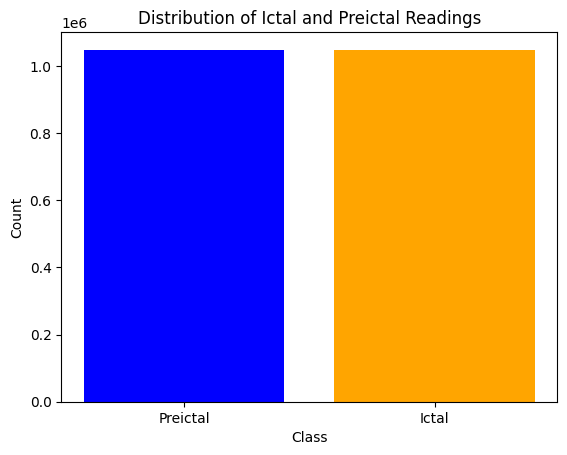

In [ ]:
#Plot of Ictal vs Preictal
plt.bar(class_counts.index, class_counts.values, color=['blue', 'orange'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Ictal and Preictal Readings')
plt.xticks(class_counts.index, ['Preictal', 'Ictal'])
plt.show()

##Hierarchical Clustering


###SubSampled HC

In [ ]:
#Standardize
scaler = StandardScaler()

In [ ]:
#Subsample
sample_size = 30000
subsample_data = data.sample(n=sample_size, random_state=42)

X_subsampled = subsample_data.drop('Outcome', axis=1)
X_scaled_subsampled = scaler.fit_transform(X_subsampled)

In [ ]:
class_counts = subsample_data['Outcome'].value_counts()

print(class_counts)

1.0    15018
0.0    14982
Name: Outcome, dtype: int64


In [ ]:
Z_subsampled = linkage(X_scaled_subsampled, method='ward', metric='euclidean')

In [ ]:
#Linkage Saved in a Pickle File
pickle_file_path = <filepath>
with open(pickle_file_path, 'wb') as file:
    pickle.dump(Z_subsampled, file)

###Dendogram

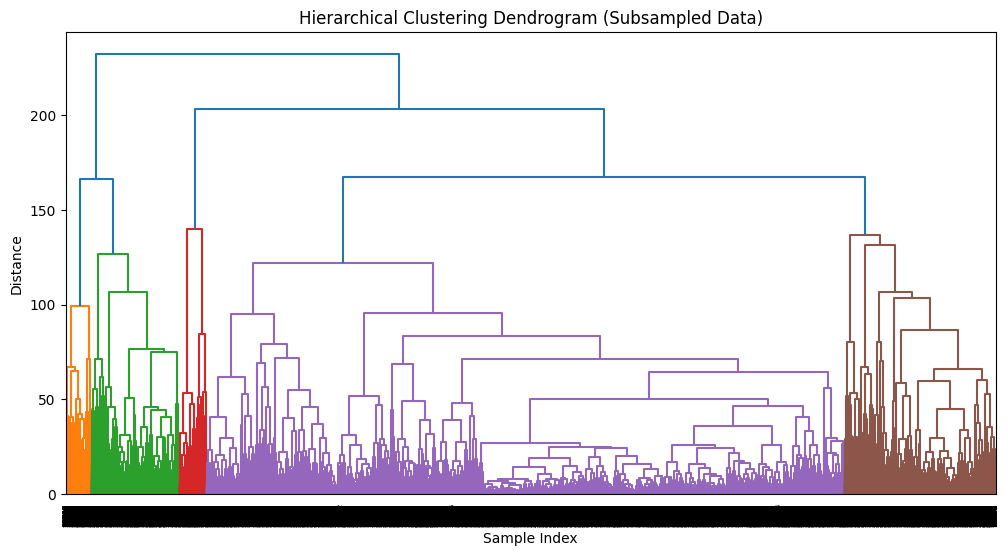

In [ ]:
#Dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z_subsampled)
plt.title('Hierarchical Clustering Dendrogram (Subsampled Data)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

#Cluster Verification

In [ ]:
num_clusters = 10

clusters = fcluster(Z_subsampled, num_clusters, criterion='maxclust')

print(clusters)

[10  7  7 ... 10  7  7]


In [ ]:
print(clusters[:100])

unique_clusters = np.unique(clusters)
print("\nUnique cluster labels:", unique_clusters)

for cluster_label in unique_clusters:
    num_points = np.sum(clusters == cluster_label)
    print(f"Cluster {cluster_label}: {num_points} data points")

[10  7  7  6  7  7 10  7  7  6  7  3  7  7  7  7  7  7  4  7  7 10  7 10
  7  6  7  7  7 10  5  3  7 10 10  1  7  7  1  7  3  7  7  7  7  7  6 10
  7  9  7  7  8  7  8  7  7  6  3  1  7  6  6  7  7  6  4  7  7  7  3  7
  3  7  7  7  3  3 10  7  7  7 10  7  6  7  7  6  7  2  7 10  7  7  7  6
  7  7  7  7]

Unique cluster labels: [ 1  2  3  4  5  6  7  8  9 10]
Cluster 1: 835 data points
Cluster 2: 462 data points
Cluster 3: 2381 data points
Cluster 4: 521 data points
Cluster 5: 344 data points
Cluster 6: 4227 data points
Cluster 7: 16366 data points
Cluster 8: 488 data points
Cluster 9: 425 data points
Cluster 10: 3951 data points


In [ ]:
subsample_data['cluster'] = clusters

cluster_outcome_counts = subsample_data.groupby(['cluster', 'Outcome']).size().unstack(fill_value=0)

print("Distribution of outcome labels within each cluster:")
print(cluster_outcome_counts)

Distribution of outcome labels within each cluster:
Outcome    0.0   1.0
cluster             
1           41   794
2           16   446
3          494  1887
4          230   291
5            6   338
6         1649  2578
7        11140  5226
8            4   484
9           21   404
10        1381  2570


#Standard And Cluster Feature Combination

In [ ]:
#Threshold
t = 10

In [ ]:
#Cluster labels Assigning
cluster_labels = fcluster(Z_subsampled, t, criterion='distance')

#Cluster Labels to One-Hot encoded values
cluster_features = to_categorical(cluster_labels)

#Combining Cluster Features with the scaled Data
combined_features = np.concatenate([X_scaled_subsampled, cluster_features], axis=1)

In [ ]:
combined_features.shape

(30000, 1879)

In [ ]:
#Combined Features into a DataFrame
combined_features_df = pd.DataFrame(combined_features, columns=list(X_subsampled.columns) + ['Cluster_' + str(i) for i in range(cluster_features.shape[1])])

In [ ]:
combined_features_df

,# FP1-F7,C3-P3,C4-P4,CZ-PZ,F3-C3,F4-C4,F7-T7,F8-T8,FP1-F3,FP2-F4,...,Cluster_1846,Cluster_1847,Cluster_1848,Cluster_1849,Cluster_1850,Cluster_1851,Cluster_1852,Cluster_1853,Cluster_1854,Cluster_1855
0,-0.144196,0.560701,0.491608,0.530722,0.872631,1.164926,-0.028876,1.182934,-0.138044,0.277031,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.117949,0.208521,-0.405855,-0.146489,-0.585612,-0.360034,-0.117964,-0.693223,0.917049,0.294170,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.042708,0.064047,-0.285228,0.026043,0.177563,0.235178,0.342964,0.159642,0.376342,0.341118,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.471297,-0.140658,-1.068724,-0.917649,0.339356,0.613874,0.118768,0.024121,0.574125,0.552754,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.301947,-0.158667,-0.194517,-0.130831,-0.114733,-0.179741,0.008588,-0.349519,-0.070211,0.044156,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,-0.346798,-0.018095,0.321766,-0.130831,0.049655,-0.083092,-0.014495,0.739590,-0.249344,-0.270690,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29996,0.275700,-0.162669,-0.401995,-0.337322,0.160010,0.270578,-0.014495,0.569870,0.050263,0.035363,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29997,-1.528384,0.611727,0.849629,0.354569,-0.436029,-0.446475,-1.982547,-1.279653,-0.945848,-0.413023,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29998,-0.259416,0.052241,0.053974,0.003104,0.076824,0.235178,-0.028876,-0.213060,-0.210991,-0.182757,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Save DataFrame
combined_features_df.to_csv("", index=False)

#CNN

In [ ]:
#Defining CNN Model
cnn_model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(combined_features.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(32, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

cnn_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#Model Summary
cnn_model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_58 (Conv1D)          (None, 1877, 32)          128       
                                                                 
 max_pooling1d_58 (MaxPooli  (None, 938, 32)           0         
 ng1D)                                                           
                                                                 
 conv1d_59 (Conv1D)          (None, 936, 32)           3104      
                                                                 
 max_pooling1d_59 (MaxPooli  (None, 468, 32)           0         
 ng1D)                                                           
                                                                 
 flatten_27 (Flatten)        (None, 14976)             0         
                                                                 
 dense_86 (Dense)            (None, 512)             

In [ ]:
#Training the CNN Model
cnn_hist = cnn_model.fit(combined_features.reshape(combined_features.shape[0], combined_features.shape[1], 1),
                                                   subsample_data['Outcome'],
                                                   epochs=30,
                                                   batch_size=16,
                                                   validation_split=0.2)

Epoch 1/30
1500/1500 [==============================] - 10s 6ms/step - loss: 0.4370 - accuracy: 0.7937 - val_loss: 0.4115 - val_accuracy: 0.8067
Epoch 2/30
1500/1500 [==============================] - 8s 6ms/step - loss: 0.4080 - accuracy: 0.8121 - val_loss: 0.3976 - val_accuracy: 0.8168
Epoch 3/30
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3939 - accuracy: 0.8189 - val_loss: 0.3967 - val_accuracy: 0.8185
Epoch 4/30
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3834 - accuracy: 0.8247 - val_loss: 0.3940 - val_accuracy: 0.8202
Epoch 5/30
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3731 - accuracy: 0.8296 - val_loss: 0.4062 - val_accuracy: 0.8193
Epoch 6/30
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3660 - accuracy: 0.8355 - val_loss: 0.3882 - val_accuracy: 0.8252
Epoch 7/30
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3569 - accuracy: 0.8401 - val_loss: 0.3920 - val_accurac

In [ ]:
#Model Prediction
cnn_predictions = (cnn_model.predict(combined_features.reshape(combined_features.shape[0], combined_features.shape[1], 1)) > 0.5).astype("int32")

938/938 [==============================] - 3s 3ms/step


###CNN Confusion Matrix

In [ ]:
#CNN Confusion Matrix
conf_matrix_CNN = confusion_matrix(subsample_data['Outcome'], cnn_predictions)

conf_matrix_CNN

array([[14399,   583],
       [  814, 14204]])

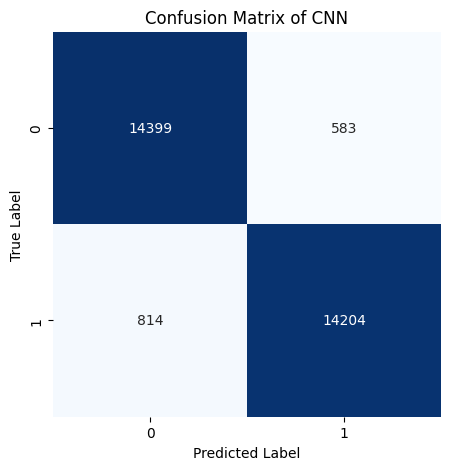

In [ ]:
#Confusion Matrix Plot
plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix_CNN, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of CNN')
plt.show()

In [ ]:
#TP,TN,FP,FN CNN Confusion Matrix Values
TP = conf_matrix_CNN[1, 1]
TN = conf_matrix_CNN[0, 0]
FP = conf_matrix_CNN[0, 1]
FN = conf_matrix_CNN[1, 0]

#Accuracy
acc_CNN_Con = ((TP + TN) / (TP + TN + FP + FN)) * 100

#Precision
pre_CNN_Con = (TP / (TP + FP)) * 100

#Sensitivity
sens_CNN_Con  = (TP / (TP + FN)) * 100

#F1 Score
f1score_CNN_Con = 2 * (pre_CNN_Con * sens_CNN_Con) / (pre_CNN_Con + sens_CNN_Con)

In [ ]:
data = [
    ["True Positives (TP)", TP],
    ["True Negatives (TN)", TN],
    ["False Positives (FP)", FP],
    ["False Negatives (FN)", FN],
    ["Accuracy", acc_CNN_Con],
    ["Precision", pre_CNN_Con],
    ["Sensitivity (Recall)", sens_CNN_Con],
     ["F1-score", f1score_CNN_Con]
]

#Tabulate the Data
print("Confusion Matrix Metrics:")
print("==========================")
print(tabulate(data, headers=["Metric", "Value"]))

Confusion Matrix Metrics:
Metric                     Value
--------------------  ----------
True Positives (TP)   14204
True Negatives (TN)   14399
False Positives (FP)    583
False Negatives (FN)    814
Accuracy                 95.3433
Precision                96.0573
Sensitivity (Recall)     94.5798
F1-score                 95.3129


###CNN Graphs

In [ ]:
#Loss and Accuracy Extraction
Cnn_train_loss = cnn_hist['loss']
Cnn_train_acc = cnn_hist['accuracy']
Cnn_val_loss = cnn_hist['val_loss']
Cnn_val_acc = cnn_hist['val_accuracy']

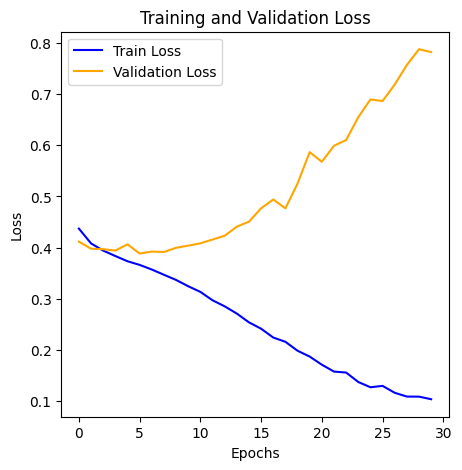

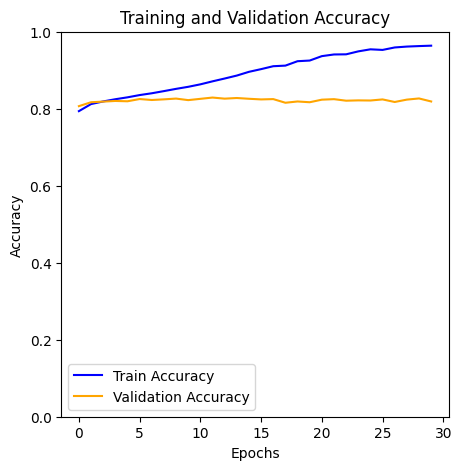

In [ ]:
#Loss Plot
plt.figure(figsize=(5,5))
plt.plot(Cnn_train_loss, label='Train Loss', color='blue')
plt.plot(Cnn_val_loss, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Accuracy Plot
plt.figure(figsize=(5,5))
plt.plot(Cnn_train_acc, label='Train Accuracy', color='blue')
plt.plot(Cnn_val_acc, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend()
plt.show()

In [ ]:
#CNN Model
cnn_model.save("")

In [ ]:
#CNN training history
with open("", 'wb') as file:
    pickle.dump(cnn_hist.history, file)

##CNN + SVM

In [ ]:
#Feature Extraction of CNN model
cnn_features_with_clusters = cnn_model.predict(combined_features.reshape(combined_features.shape[0], combined_features.shape[1], 1))

938/938 [==============================] - 34s 37ms/step


In [ ]:
#SVM Classifier
svm_classifier = SVC()
svm_classifier.fit(cnn_features_with_clusters, subsample_data['Outcome'])

#SVM Predicitions
svm_predictions = svm_classifier.predict(cnn_features_with_clusters)

###CNN + SVM Confusion Matix

In [ ]:
#Confusion Matrix
conf_matrix_svm = confusion_matrix(subsample_data['Outcome'], svm_predictions)

conf_matrix_svm

array([[14385,   597],
       [  800, 14218]])

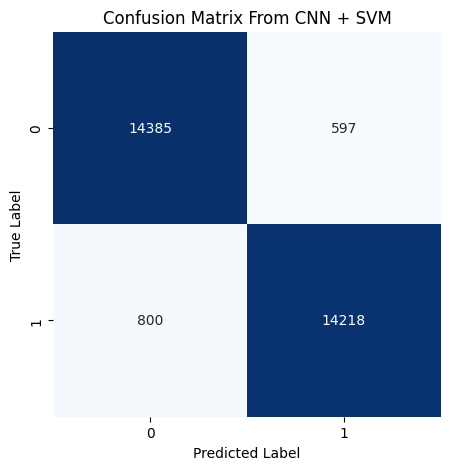

In [ ]:
#Confusion Matrix Plot
plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix From CNN + SVM')
plt.show()

In [ ]:
#TP,TN,FP,FN from Confusion Matrix
TP_svm = conf_matrix_svm[1, 1]
TN_svm = conf_matrix_svm[0, 0]
FP_svm = conf_matrix_svm[0, 1]
FN_svm = conf_matrix_svm[1, 0]

#Accuracy
accuracy_svm = ((TP_svm + TN_svm) / (TP_svm + TN_svm + FP_svm + FN_svm)) * 100

#Precision
precision_svm = (TP_svm / (TP_svm + FP_svm)) * 100

#Sensitivity
sensitivity_svm = (TP_svm / (TP_svm + FN_svm)) * 100

#F1 Score
f1score_svm = 2 * (precision_svm * sensitivity_svm) / (precision_svm + sensitivity_svm)

In [ ]:
data_svm = [
    ["True Positives (TP)", TP_svm],
    ["True Negatives (TN)", TN_svm],
    ["False Positives (FP)", FP_svm],
    ["False Negatives (FN)", FN_svm],
    ["Accuracy", accuracy_svm],
    ["Precision", precision_svm],
    ["Sensitivity (Recall)", sensitivity_svm],
    ["F1-score", f1score_svm]
]

#Tabulate the Data
print("Confusion Matrix Metrics for SVM Classifier:")
print("===========================================")
print(tabulate(data_svm, headers=["Metric", "Value"]))

Confusion Matrix Metrics for SVM Classifier:
Metric                     Value
--------------------  ----------
True Positives (TP)   14218
True Negatives (TN)   14385
False Positives (FP)    597
False Negatives (FN)    800
Accuracy                 95.3433
Precision                95.9703
Sensitivity (Recall)     94.6731
F1-score                 95.3173


In [ ]:
#SVM Model Saving
pickle.dump(svm_classifier,open('','wb'))

#MLPS

In [ ]:
#Spliting the data for Training and Validation
X_train, X_val, y_train, y_val = train_test_split(combined_features, subsample_data['Outcome'], test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)

print(X_val.shape)

print(y_train.shape)

print(y_val.shape)

(24000, 1879)
(6000, 1879)
(24000,)
(6000,)


In [ ]:
#Counting Occurences
class_counts_val = Counter(y_val)

#Display the counts
print("Class Counts in y_val:")
print(class_counts_val)

Class Counts in y_val:
Counter({1.0: 3008, 0.0: 2992})


In [ ]:
#MLP Model
mlp_model = Sequential([
    Flatten(input_shape=(combined_features.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

#Model Compiling
mlp_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#Model Summary
mlp_model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_28 (Flatten)        (None, 1879)              0         
                                                                 
 dense_88 (Dense)            (None, 128)               240640    
                                                                 
 dropout_29 (Dropout)        (None, 128)               0         
                                                                 
 dense_89 (Dense)            (None, 64)                8256      
                                                                 
 dense_90 (Dense)            (None, 64)                4160      
                                                                 
 dense_91 (Dense)            (None, 32)                2080      
                                                                 
 dense_92 (Dense)            (None, 1)               

In [ ]:
#Model Training
mlp_hist = mlp_model.fit(X_train, y_train, epochs=30, batch_size=16, validation_data=(X_val, y_val))

Epoch 1/30
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4456 - accuracy: 0.7886 - val_loss: 0.4182 - val_accuracy: 0.8117
Epoch 2/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3915 - accuracy: 0.8219 - val_loss: 0.4033 - val_accuracy: 0.8172
Epoch 3/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3720 - accuracy: 0.8292 - val_loss: 0.3975 - val_accuracy: 0.8195
Epoch 4/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3566 - accuracy: 0.8387 - val_loss: 0.4069 - val_accuracy: 0.8187
Epoch 5/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3450 - accuracy: 0.8437 - val_loss: 0.4039 - val_accuracy: 0.8153
Epoch 6/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3347 - accuracy: 0.8504 - val_loss: 0.4032 - val_accuracy: 0.8210
Epoch 7/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3258 - accuracy: 0.8541 - val_loss: 0.3970 - val_accuracy:

In [ ]:
#Prediction with Model
mlp_predictions = (mlp_model.predict(X_val) > 0.5).astype("int32")

188/188 [==============================] - 1s 2ms/step


In [ ]:
#Saving the Training History
with open('', 'wb') as file:
    pickle.dump(mlp_hist.history, file)

##MLP Confusion Matrix

In [ ]:
#Confusion Matrix
conf_matrix_mlp = confusion_matrix(y_val, mlp_predictions)

conf_matrix_mlp

array([[2462,  530],
       [ 584, 2424]])

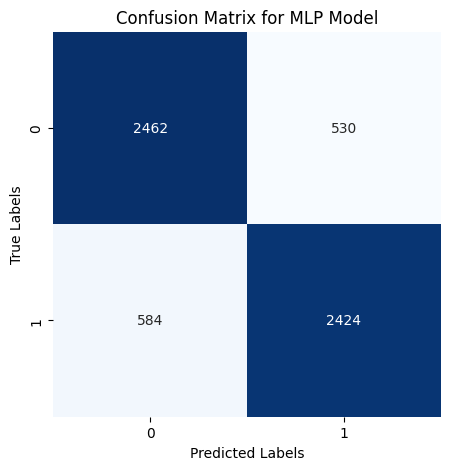

In [ ]:
#Confusion Matrix Plot
plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix_mlp, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for MLP Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
#TP,TN,FP,FN from the Confusion Matrix
TP_MLP = conf_matrix_mlp[1, 1]
TN_MLP = conf_matrix_mlp[0, 0]
FP_MLP = conf_matrix_mlp[0, 1]
FN_MLP = conf_matrix_mlp[1, 0]

#Accuracy
acc_MLP = ((TP_MLP + TN_MLP) / (TP_MLP + TN_MLP + FP_MLP + FN_MLP)) * 100

#Precision
pre_MLP = (TP_MLP / (TP_MLP + FP_MLP)) * 100

#Sensitivity
sens_MLP = (TP_MLP / (TP_MLP + FN_MLP)) * 100

#F1 Score
f1score_MLP = 2 * (pre_MLP * sens_MLP) / (pre_MLP + sens_MLP)

In [ ]:
data_MLP = [
    ["True Positives (TP)", TP_MLP],
    ["True Negatives (TN)", TN_MLP],
    ["False Positives (FP)", FP_MLP],
    ["False Negatives (FN)", FN_MLP],
    ["Accuracy", acc_MLP],
    ["Precision", pre_MLP],
    ["Sensitivity (Recall)", sens_MLP],
    ["F1-score", f1score_MLP]
]

#Tabulate the Data
print("Confusion Matrix Metrics for MLP:")
print("=================================")
print(tabulate(data_MLP, headers=["Metric", "Value"]))

Confusion Matrix Metrics for MLP:
Metric                    Value
--------------------  ---------
True Positives (TP)   2424
True Negatives (TN)   2462
False Positives (FP)   530
False Negatives (FN)   584
Accuracy                81.4333
Precision               82.0582
Sensitivity (Recall)    80.5851
F1-score                81.315


##MLP Graphs

In [ ]:
#Loss and Acc Extraction from History
Mlp_train_loss = mlp_hist['loss']
Mlp_train_acc = mlp_hist['accuracy']
Mlp_val_loss = mlp_hist['val_loss']
Mlp_val_acc = mlp_hist['val_accuracy']

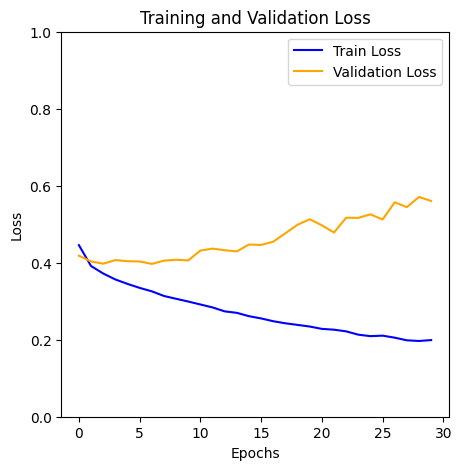

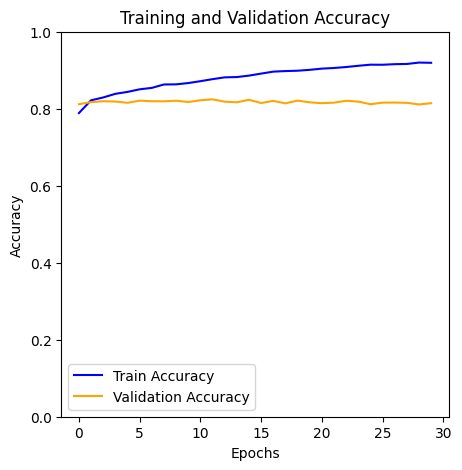

In [ ]:
#Loss Plot
plt.figure(figsize=(5,5))
plt.plot(Mlp_train_loss, label='Train Loss', color='blue')
plt.plot(Mlp_val_loss, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend()
plt.show()

#Accuracy Plot
plt.figure(figsize=(5,5))
plt.plot(Mlp_train_acc, label='Train Accuracy', color='blue')
plt.plot(Mlp_val_acc, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend()
plt.show()

In [ ]:
#MLP Model
mlp_model.save('')

#COMPARISON

In [ ]:
results ={'Accuracy': [acc_CNN_Con,accuracy_svm,acc_MLP],
          'Precision': [pre_CNN_Con,precision_svm,pre_MLP],
          'Sensitivity':[sens_CNN_Con,sensitivity_svm,sens_MLP],
          'F1 Score' : [f1score_CNN_Con,f1score_svm,f1score_MLP]}
index = ['CNN','CNN+SVM','MLP']

In [ ]:
results =pd.DataFrame(results,index=index)
print(results)

          Accuracy  Precision  Sensitivity   F1 Score
CNN      95.343333  96.057348    94.579838  95.312867
CNN+SVM  95.343333  95.970300    94.673059  95.317266
MLP      81.433333  82.058226    80.585106  81.314995


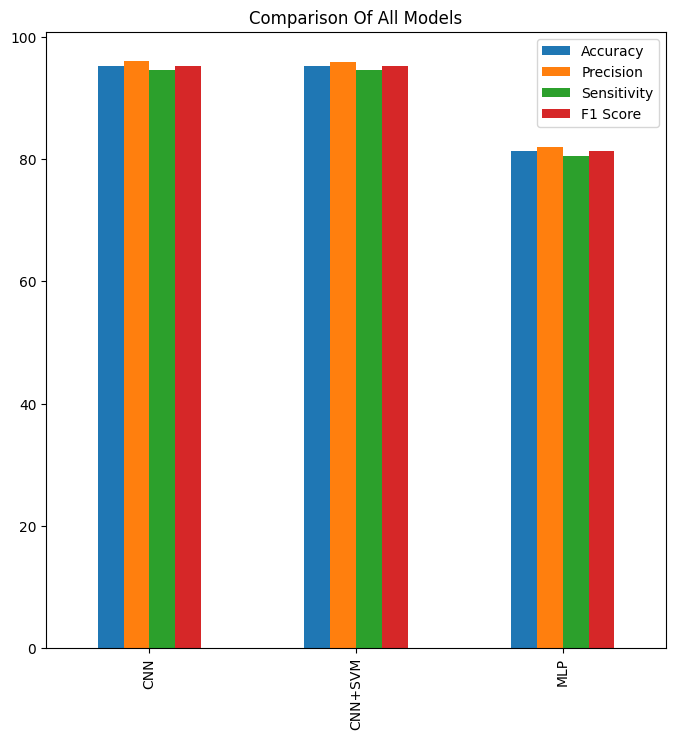

In [ ]:
fig =results.plot(kind='bar',title='Comparison Of All Models',figsize =(8,8)).get_figure()

##Accuracy Graph

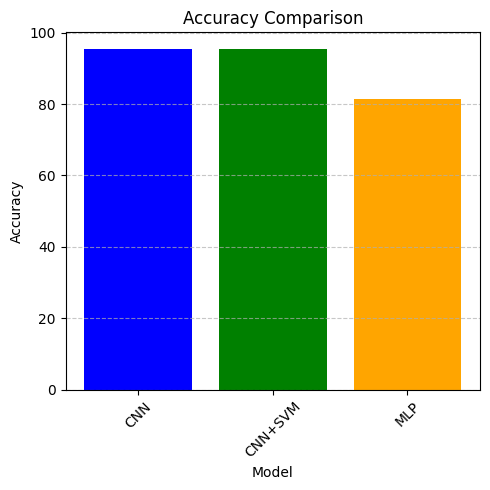

In [ ]:
plt.figure(figsize=(5,5))
plt.bar(results.index, results['Accuracy'], color=['blue', 'green', 'orange'])
plt.title('Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##Precision Graph

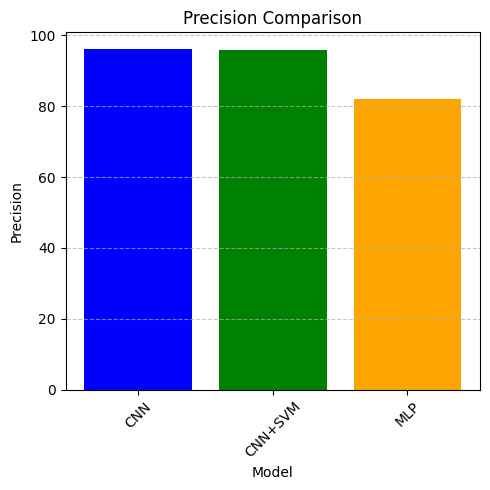

In [ ]:
plt.figure(figsize= (5,5))
plt.bar(results.index, results['Precision'], color=['blue', 'green', 'orange'])
plt.title('Precision Comparison')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##Sensitivity Graph

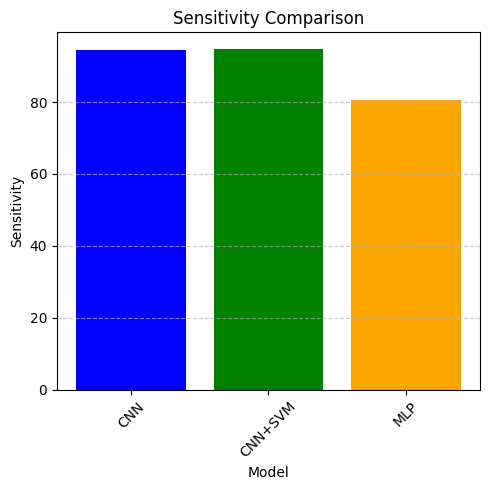

In [ ]:
plt.figure(figsize=(5,5))
plt.bar(results.index, results['Sensitivity'], color=['blue', 'green', 'orange'])
plt.title('Sensitivity Comparison')
plt.xlabel('Model')
plt.ylabel('Sensitivity')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##F1 Score Graph

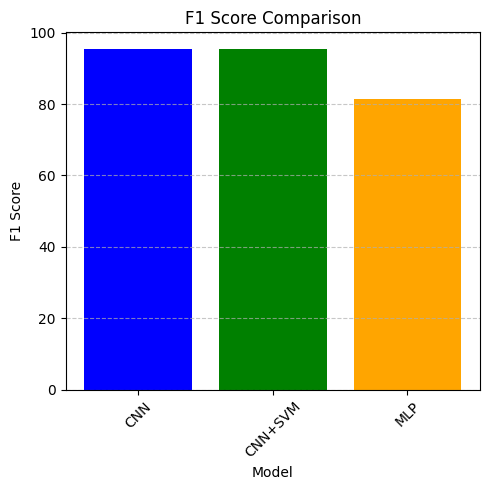

In [ ]:
plt.figure(figsize=(5,5))
plt.bar(results.index, results['F1 Score'], color=['blue', 'green', 'orange'])
plt.title('F1 Score Comparison')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#TESTING

In [ ]:
df =  pd.read_csv('')

In [ ]:
subsample = df.sample(n=30000, random_state = 42)

#Count the number of ictal (label 1) and preictal (label 0) samples in the sampled data
ictal_count = subsample[subsample['Outcome'] == 1].shape[0]
preictal_count = subsample[subsample['Outcome'] == 0].shape[0]

print(f'Number of ictal samples in the subsample: {ictal_count}')
print(f'Number of preictal samples in the subsample: {preictal_count}')

Number of ictal samples in the subsample: 15018
Number of preictal samples in the subsample: 14982


In [ ]:
subsample.head()

,# FP1-F7,C3-P3,C4-P4,CZ-PZ,F3-C3,F4-C4,F7-T7,F8-T8,FP1-F3,FP2-F4,...,P3-O1,P4-O2,P7-O1,P7-T7,P8-O2,T7-FT9,T7-P7,T8-P8-0,T8-P8-1,Outcome
1125183,-0.000019,0.000056,0.000052,0.000055,0.000115,0.000142,-0.000003,0.000140,-0.000018,0.000038,...,0.000074,0.000084,0.000032,-2.170450e-04,-0.000053,0.000006,2.174360e-04,0.000095,0.000095,1.0
25825,0.000015,0.000021,-0.000041,-0.000015,-0.000076,-0.000044,-0.000015,-0.000080,0.000122,0.000040,...,-0.000022,0.000063,-0.000006,-4.980000e-05,0.000032,-0.000038,5.020000e-05,0.000034,0.000034,0.0
792140,0.000005,0.000006,-0.000029,0.000003,0.000024,0.000029,0.000047,0.000020,0.000050,0.000046,...,-0.000030,-0.000023,0.000071,7.480000e-05,-0.000002,-0.000024,-7.440000e-05,0.000005,0.000005,0.0
1954170,-0.000061,-0.000014,-0.000110,-0.000093,0.000045,0.000075,0.000017,0.000004,0.000077,0.000075,...,-0.000184,-0.000135,-0.000083,-5.010000e-05,-0.000002,-0.000027,5.070000e-05,-0.000136,-0.000136,1.0
282235,-0.000039,-0.000016,-0.000019,-0.000013,-0.000015,-0.000022,0.000002,-0.000040,-0.000009,0.000006,...,0.000014,-0.000005,0.000010,9.770000e-07,-0.000012,-0.000002,-5.860000e-07,-0.000012,-0.000012,0.0


In [ ]:
#Standardize
scaler = StandardScaler()

In [ ]:
subsample_dropped = subsample.drop('Outcome', axis=1)
subsample_dropped_scaler = scaler.fit_transform(subsample_dropped)

In [ ]:
subsample_dropped

,# FP1-F7,C3-P3,C4-P4,CZ-PZ,F3-C3,F4-C4,F7-T7,F8-T8,FP1-F3,FP2-F4,...,FZ-CZ,P3-O1,P4-O2,P7-O1,P7-T7,P8-O2,T7-FT9,T7-P7,T8-P8-0,T8-P8-1
1125183,-0.000019,0.000056,0.000052,5.450000e-05,0.000115,0.000142,-0.000003,0.000140,-0.000018,0.000038,...,0.000103,0.000074,8.380000e-05,0.000032,-2.170450e-04,-0.000053,0.000006,2.174360e-04,0.000095,0.000095
25825,0.000015,0.000021,-0.000041,-1.470000e-05,-0.000076,-0.000044,-0.000015,-0.000080,0.000122,0.000040,...,-0.000097,-0.000022,6.310000e-05,-0.000006,-4.980000e-05,0.000032,-0.000038,5.020000e-05,0.000034,0.000034
792140,0.000005,0.000006,-0.000029,2.930000e-06,0.000024,0.000029,0.000047,0.000020,0.000050,0.000046,...,0.000017,-0.000030,-2.250000e-05,0.000071,7.480000e-05,-0.000002,-0.000024,-7.440000e-05,0.000005,0.000005
1954170,-0.000061,-0.000014,-0.000110,-9.350000e-05,0.000045,0.000075,0.000017,0.000004,0.000077,0.000075,...,0.000023,-0.000184,-1.350920e-04,-0.000083,-5.010000e-05,-0.000002,-0.000027,5.070000e-05,-0.000136,-0.000136
282235,-0.000039,-0.000016,-0.000019,-1.310000e-05,-0.000015,-0.000022,0.000002,-0.000040,-0.000009,0.000006,...,-0.000010,0.000014,-4.880000e-06,0.000010,9.770000e-07,-0.000012,-0.000002,-5.860000e-07,-0.000012,-0.000012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091538,-0.000045,-0.000002,0.000034,-1.310000e-05,0.000007,-0.000010,-0.000001,0.000088,-0.000033,-0.000036,...,-0.000017,-0.000013,-2.870000e-05,0.000016,1.310000e-05,-0.000069,0.000024,-1.270000e-05,-0.000055,-0.000055
651403,0.000035,-0.000017,-0.000041,-3.420000e-05,0.000021,0.000033,-0.000001,0.000068,0.000007,0.000005,...,0.000002,-0.000040,-4.860000e-05,-0.000035,2.680000e-05,-0.000023,0.000011,-2.640000e-05,-0.000044,-0.000044
2041642,-0.000198,0.000061,0.000089,3.650000e-05,-0.000057,-0.000054,-0.000268,-0.000149,-0.000126,-0.000055,...,-0.000029,0.000103,4.200000e-05,0.000221,-2.268130e-04,0.000059,0.000199,2.272040e-04,-0.000047,-0.000047
1327862,-0.000034,0.000005,0.000006,5.860000e-07,0.000010,0.000029,-0.000003,-0.000024,-0.000028,-0.000024,...,0.000035,-0.000010,-1.150000e-05,0.000010,-3.710000e-06,0.000051,-0.000003,4.100000e-06,0.000011,0.000011


In [ ]:
Z_test = linkage(subsample_dropped_scaler, method='ward', metric='euclidean')

In [ ]:
#Threshold
thres = 10

In [ ]:
#Cluster labels Assigning
cluster_labels_test = fcluster(Z_test, thres , criterion='distance')

#Cluster Labels to One-Hot encoded values
cluster_features_test = to_categorical(cluster_labels_test)

#Combining Cluster Features with the scaled Data
combined_features_test_1 = np.concatenate([subsample_dropped_scaler, cluster_features_test], axis=1)

In [ ]:
combined_features_test.shape

(30000, 1879)

In [ ]:
#Load The Models
cnn_model_for_test = load_model('')
svm_for_test = pickle.load(open('', 'rb'))

In [ ]:
#CNN Model Features
cnn_features_with_clusters_test = cnn_model_for_test.predict(combined_features_test_1.reshape(combined_features_test_1.shape[0], combined_features_test_1.shape[1], 1))

938/938 [==============================] - 3s 3ms/step


In [ ]:
#SVM Prediction
svm_predictions_test = svm_for_test.predict(cnn_features_with_clusters_test)

In [ ]:
#10 Random Indicies
random_indices = np.random.randint(0, len(subsample), size=10)

#Selecting 10 Random Samples
random_samples = subsample.iloc[random_indices]

In [ ]:
#Predicted Vs Original Outcome Comparison
original_outcomes = random_samples['Outcome'].tolist()
svm_predicted_outcomes_test = svm_predictions_test[random_indices]

In [ ]:
print("Original   | SVM Predicted")
for i in range(10):
    original_label = "Ictal" if original_outcomes[i] == 1 else "Preictal"
    predicted_label = "Ictal" if svm_predicted_outcomes_test[i] == 1 else "Preictal"
    print(f"{original_label:<10} | {predicted_label}")

Original   | SVM Predicted
Preictal   | Preictal
Preictal   | Preictal
Preictal   | Preictal
Ictal      | Ictal
Preictal   | Preictal
Ictal      | Preictal
Ictal      | Ictal
Preictal   | Preictal
Ictal      | Ictal
Preictal   | Preictal
